# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

#수업시간에 배운 CNN을 이용하여 이미지를 분류해 보자!!!


데이터 셋 정보: https://www.cs.toronto.edu/~kriz/cifar.html

## CIFAR-10 데이터 셋 읽어오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


(train_input, train_target), (test_input, test_target) = \
    cifar10.load_data()


170508288/170498071 [==============================] - 7s 0us/step


##로드한 데이터의 shape을 확인하시오 (샘플 수: 50000, 32 x 32, RGB format).
##데이터 셋의 클래스 수를 확인하시오 (numpy unique() 활용 - 7일차 교육 MNIST 실습의 데이터 준비 슬라이드 참고)

In [ ]:
print(train_input.shape, test_input.shape)

print(np.unique(train_target, return_counts = True))

(50000, 32, 32, 3) (10000, 32, 32, 3)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


## 이미지의 픽셀값을 0~1값으로 정규화하시오

In [ ]:
#이미지 정규화 (전체 픽셀을 각각 255로 나눔, Numpy Braodcast 특성 활용)

train_scaled = train_input / 255.0

##데이터 세트를 훈련데이터 (80%)와 검증세트로 분리하시오

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

#분류가 잘 되었는지 확인하시오 (훈련 세트 = 40000, 검증세트 = 10000)

In [ ]:
#shape를 출력
print(train_scaled.shape, val_scaled.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3)


## matplotlib의 imshow() 메소드를 사용하여 정규화된 훈련세트의 0번째 인덱스의 이미지를 color bar와 함께 출력하시오. 

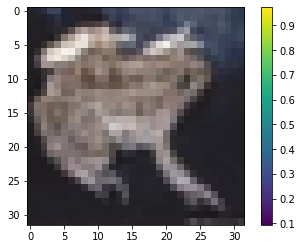

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_scaled[0]) #변수명은 변경 가능
plt.colorbar()
plt.show()

## 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()

##첫번째 합성곱 층을 생성후 모델에 추가하시오.
필터 수: 32개\
필터 (커널) 사이즈: 3 x 3 x 3\
활성화 함수: ReLU\
패딩: same padding\
stride: 1\
input_shape는 데이터 특성에 맞게 지정

In [ ]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))

## 2x2 최대 풀링 (max pooling) 층을 추가하시오
stride: 2

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

##두번째 합성곱 층을 생성 후 모델에 추가하시오
필터 수: 64개\
필터 (커널) 사이즈: 3 x 3 x 32\
활성화 함수: ReLU\
패딩: same padding\
stride: 1

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))

## 2x2 최대 풀링 (max pooling) 층을 추가하시오.
stride: 2

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

## Flatten 층을 추가하고, 출력을 위한 Dense 층 두개를 추가하시오.
## Flatten 층과 첫번째 Dense 층 사이에 Dropout 층을 추가하시오 (Dropout율: 30%) 
첫번째 Dense 층의 뉴런 갯수: 100개\
첫번째 Dense 층의 활성화 함수: ReLU\
두번째 Dense 층의 뉴런 갯수: 데이터 특성에 맞게 설정\
두번째 Dense 층의 활성화 함수: Softmax


In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

##model.summary()를 사용하여 모델이 잘 구성되었는지 확인

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               409700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

##utils.plot_model()을 사용하여 모델이 잘 구성되었는지 확인

In [ ]:
keras.utils.plot_model(model, show_shapes = True, dpi = 300)

## 모델 컴파일과 훈련
optimizer: adam\
손실함수: 다중분류를 위한 함수로 지정\
accuracy 메트릭 추가

In [ ]:
#accuracy는 매개변수를 통해 별도 추가

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

## ModelCheckPoint 콜백 및 Early_stopping 콜백 사용을 사용하여 최적의 모델을 찾고 저장하시오.

In [ ]:
##modelCheckPoint 콜백과 Early_stopping 콜백은 리스트로 동시에 전달 가능

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs = 30, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/30
1250/1250 [==============================] - 39s 8ms/step - loss: 1.5758 - accuracy: 0.4314 - val_loss: 1.2475 - val_accuracy: 0.5579
Epoch 2/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2328 - accuracy: 0.5595 - val_loss: 1.1060 - val_accuracy: 0.6178
Epoch 3/30
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0812 - accuracy: 0.6197 - val_loss: 1.0064 - val_accuracy: 0.6487
Epoch 4/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9848 - accuracy: 0.6519 - val_loss: 0.9753 - val_accuracy: 0.6543
Epoch 5/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9128 - accuracy: 0.6764 - val_loss: 0.9165 - val_accuracy: 0.6814
Epoch 6/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8478 - accuracy: 0.7005 - val_loss: 0.9145 - val_accuracy: 0.6787
Epoch 7/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7951 - accuracy: 0.7163 - val_loss: 0.9161 - val_ac

## matplotlib를 사용하여 학습 세트와 검증세트의 Loss율을 확인하시오.

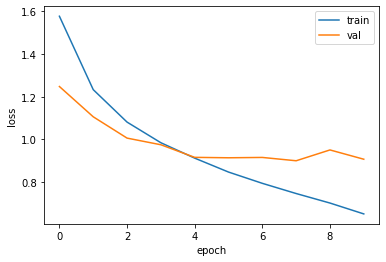

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## model.evaluate()를 사용하여 검증 세트에 대한 성능을 측정하시오

In [ ]:
model.evaluate(val_scaled, val_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.9006 - accuracy: 0.6910


[0.900563657283783, 0.6909999847412109]

##검증세트의 두번째 (인덱스 1) 이미지 출력

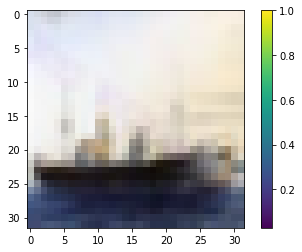

In [ ]:
plt.imshow(val_scaled[1]) #변수명은 변경 가능
plt.colorbar()
plt.show()

## 검증세트 두번째 (인덱스 1) 샘플의 예측결과를 확인

In [ ]:
#predict()메소드를 사용하면 됩니다. 
#val_scaled[1:2] --> 검증데이터의 인덱스 1에 해당하는 샘플

preds = model.predict(val_scaled[1:2])
print(preds)

[[9.95990005e-04 1.12851994e-04 2.22356857e-06 1.78805712e-05
  6.15918282e-07 8.75277451e-08 7.74409727e-07 2.73102874e-09
  9.97632265e-01 1.23730674e-03]]


## 위 예측결과를 그래프로 출력 후 확인

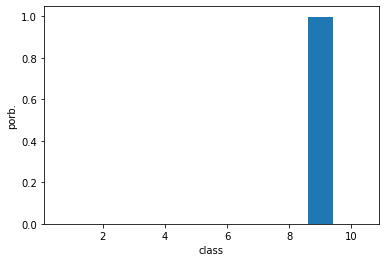

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('porb.')
plt.show()

##예측결과를 보기좋게 출력

In [ ]:
classes = ['비행기', '자동차', '새', '고양이', '사슴',
           '강아지', '개구리', '말', '배', '트럭']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

배


##테스트 세트에 대한 성능을 평가해보자 (evaluate() 사용)

In [ ]:
#테스트 데이터도 정규화가 필요합니다.
#성능평가시 evaluate()를 사용합니다.

test_scaled = test_input / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.8980 - accuracy: 0.6939


[0.8979577422142029, 0.6938999891281128]

## 성능을 향상시켜보자 (레이어 추가 등)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               409700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [ ]:
model2 = keras.Sequential()

In [ ]:
model2.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(200, activation = 'relu'))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               819400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)              

In [ ]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb2 = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only = True)
early_stopping_cb2 = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

history = model2.fit(train_scaled, train_target, epochs = 30, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb2, early_stopping_cb2])

Epoch 1/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4786 - accuracy: 0.4645 - val_loss: 1.1357 - val_accuracy: 0.5998
Epoch 2/30
1250/1250 [==============================] - 11s 8ms/step - loss: 1.1186 - accuracy: 0.6041 - val_loss: 0.9928 - val_accuracy: 0.6513
Epoch 3/30
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9715 - accuracy: 0.6572 - val_loss: 0.9413 - val_accuracy: 0.6716
Epoch 4/30
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8637 - accuracy: 0.6963 - val_loss: 0.8698 - val_accuracy: 0.6999
Epoch 5/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7735 - accuracy: 0.7275 - val_loss: 0.8537 - val_accuracy: 0.7018
Epoch 6/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6996 - accuracy: 0.7522 - val_loss: 0.8562 - val_accuracy: 0.7012
Epoch 7/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6290 - accuracy: 0.7759 - val_loss: 0.8576 - val_ac

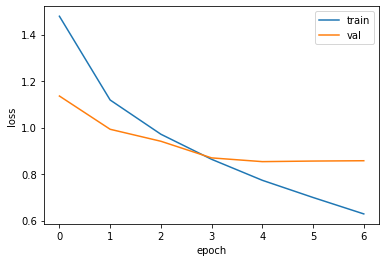

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model2.evaluate(val_scaled, val_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.8537 - accuracy: 0.7018


[0.8536809682846069, 0.7017999887466431]

In [ ]:
model2.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.8691 - accuracy: 0.7016


[0.8691220879554749, 0.7016000151634216]